# SATISFACTION WITH THE BALANCE BETWEEN WORK AND HOME


The objective of this project is to analyse the job satisfaction and balance between work and home in various provinces of Canada. The dataset is taken from Statistics Canada in which input parameters are based on age group, sex, geography, employment types etc. It shall be analyzed mainly by Data preprocessing, Data Analysis & Visualization in which following steps would be explored to achieve the required outcome,

    Importing raw dataset from Statistics Canada 
    Identifying and handling the missing values in dataset
    Encoding the categorical data
    Splitting the dataset
    Manipulating the data using various data analysis techniques
    Regression Analysis and predictive analysis to evaulate the model & predictions
    Visualization with generating Waffle chart using Waffle function from pywaffle



Data link: https://open.canada.ca/data/en/dataset/eb566d86-cdda-4d85-8b1b-727eb719bf21

In [1]:
# important libraries:

import pandas as pd
import numpy as np 
import seaborn as sns 
import statsmodels.api as sm
import scipy.stats as sc
import matplotlib.pyplot as plt
sns.set()


In [2]:
import warnings
warnings.filterwarnings('ignore')

DATA PRE-PROCESSING

In [4]:
# load Datasets
df= pd.read_csv("C:/Users/singh/Downloads/14100207-eng/14100207.csv")
df.head(6)

,REF_DATE,GEO,DGUID,Age group,Sex,Employment type,Response,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2016,Canada,2016A000011124,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance",Number of persons,Persons,249,thousands,3,v120531032,1.1.1.1.1.1,20975.0,NaN,NaN,NaN,0
1,2016,Canada,2016A000011124,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance",Percentage of persons,Percent,239,units,0,v120531033,1.1.1.1.1.2,100.0,NaN,NaN,NaN,1
2,2016,Canada,2016A000011124,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance","Low 95% confidence interval, percent",Percent,239,units,0,v120531034,1.1.1.1.1.3,100.0,NaN,NaN,NaN,1
3,2016,Canada,2016A000011124,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance","High 95% confidence interval, percent",Percent,239,units,0,v120531035,1.1.1.1.1.4,100.0,NaN,NaN,NaN,1
4,2016,Canada,2016A000011124,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,Number of persons,Persons,249,thousands,3,v120531036,1.1.1.1.2.1,14286.0,NaN,NaN,NaN,0
5,2016,Canada,2016A000011124,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,Percentage of persons,Percent,239,units,0,v120531037,1.1.1.1.2.2,68.1,NaN,NaN,NaN,1


In [5]:
df.shape

(42120, 19)

In [6]:
# dropping redundant columns having same info or irrelavant with job satisfaction
df= df.drop(['REF_DATE','DGUID','UOM','UOM_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','SCALAR_ID','DECIMALS','SCALAR_FACTOR'],axis=1)
df.head(8)

,GEO,Age group,Sex,Employment type,Response,Estimates,VALUE
0,Canada,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance",Number of persons,20975.0
1,Canada,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance",Percentage of persons,100.0
2,Canada,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance","Low 95% confidence interval, percent",100.0
3,Canada,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance","High 95% confidence interval, percent",100.0
4,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,Number of persons,14286.0
5,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,Percentage of persons,68.1
6,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,"Low 95% confidence interval, percent",67.0
7,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,"High 95% confidence interval, percent",69.2


In [7]:
# Dropping the records with VALUE missing in data dataframe.
df = df[~df.VALUE.isnull()].copy()

# checking the missing values
df.isnull().sum()

GEO                0
Age group          0
Sex                0
Employment type    0
Response           0
Estimates          0
VALUE              0
dtype: int64

In [8]:
#For the 'VALUE' feature the content in the form of no. of persons, percentage ,low 95% confidence interval and High 95% confidence interval
# so removing the first and last two content of 'VALUE' w.r.t the 'Estimates' feature
df1=df.iloc[1::4]
df1.head(2)

,GEO,Age group,Sex,Employment type,Response,Estimates,VALUE
1,Canada,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance",Percentage of persons,100.0
5,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,Percentage of persons,68.1


In [9]:
df2=df1.copy()
## renaming one of the string of 'Response' feature with unknown
df2.loc[df2['Response'] == "Don't know/refusal/not stated", 'Response'] ='unknown'
df2.head(10)

,GEO,Age group,Sex,Employment type,Response,Estimates,VALUE
1,Canada,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance",Percentage of persons,100.0
5,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,Percentage of persons,68.1
9,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied,Percentage of persons,18.0
13,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Satisfied,Percentage of persons,50.1
17,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Neither satisfied nor dissatisfied,Percentage of persons,20.3
21,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Dissatisfied or very dissatisfied,Percentage of persons,10.7
25,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Dissatisfied,Percentage of persons,9.3
29,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very dissatisfied,Percentage of persons,1.3
33,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",unknown,Percentage of persons,0.9
37,Canada,"Total, 15 years and over",Both sexes,Paid worker,"Total, satisfaction with work-home balance",Percentage of persons,100.0


In [10]:
df2.rename(columns = {'Age group':'Age'}, inplace = True)
df2.rename(columns = {'Employment type':'Employment_type'}, inplace = True)
df2.head(2)

,GEO,Age,Sex,Employment_type,Response,Estimates,VALUE
1,Canada,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance",Percentage of persons,100.0
5,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied,Percentage of persons,68.1


# DATA VISUALISATION

In [11]:
from pywaffle import Waffle

In [12]:
# create dictionary with key value pairs for waffle chart values
Response = dict(df1.Response.value_counts())
# Response

In [13]:
# labels with percents for legend
percent = dict(df2.Response.value_counts(normalize=True))
labels = [f'{k} Response: {v*100:.1f}%' for k,v in percent.items()]
labels

['Total, satisfaction with work-home balance Response: 20.4%',
 'Very satisfied or satisfied Response: 19.7%',
 'Satisfied Response: 17.8%',
 'Very satisfied Response: 13.0%',
 'Neither satisfied nor dissatisfied Response: 11.5%',
 'Dissatisfied or very dissatisfied Response: 8.0%',
 'Dissatisfied Response: 7.4%',
 'Very dissatisfied Response: 1.5%',
 'unknown Response: 0.8%']

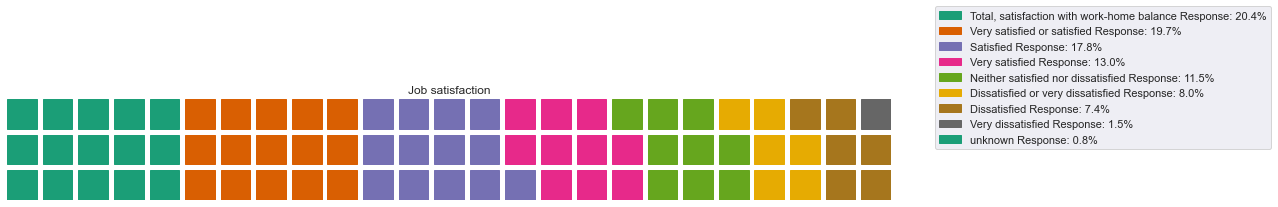

In [14]:
# waffle chart to visualize reponse feature affects on datasets:
fig = plt.figure(FigureClass=Waffle,
                 figsize=(18,8),
                 rows=3,
                 columns=25,
                 values=Response,
                 legend={'loc': (1.05, 0.5), 'labels': labels},
                 title={'label': 'Job satisfaction'},
                 cmap_name='Dark2')

Both sexes    0.387602
Males         0.312098
Females       0.300300
Name: Sex, dtype: float64


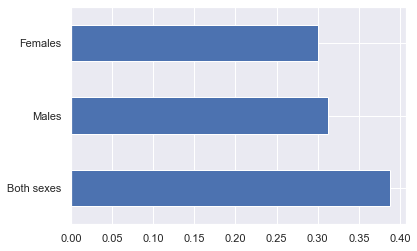

In [15]:
# Let's calculate the percentage of sex category 
print(df2.Sex.value_counts(normalize=True))

#plot the bar graph of percentage sex categories
df2.Sex.value_counts(normalize=True).plot.barh()
plt.show()

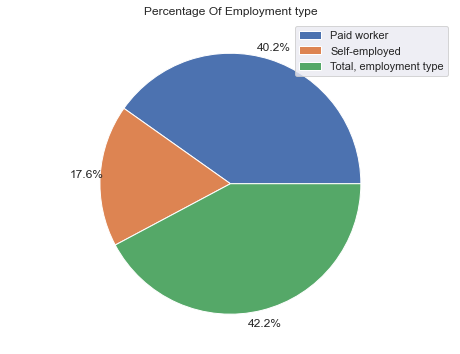

In [16]:
#calculate the percentage of each job status category
plt.figure(figsize=(8,6))

Employment_type = df2.groupby(['Employment_type'])['Employment_type'].count()
labels = list(Employment_type.index)
data = list(Employment_type)
plt.title('Percentage Of Employment type')
plt.axis('equal')
# plt.pie(x=data, autopct='%.2f%%',
#          startangle=90)
plt.pie(data,  autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)

plt.legend(labels)
plt.show() 



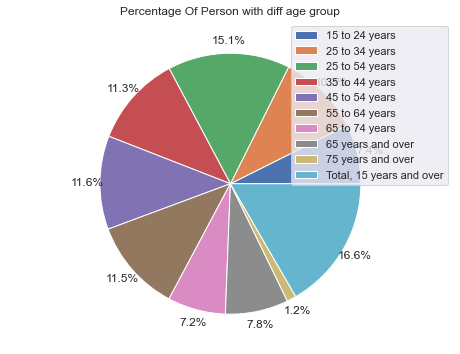

In [17]:
#calculate the percentage of  age  category
plt.figure(figsize=(8,6))
Age = df2.groupby(['Age'])['Age'].count()
labels = list(Age.index)
data = list(Age)
plt.title('Percentage Of Person with diff age group')
plt.axis('equal')
plt.pie(data,  autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)

plt.legend(labels)
plt.show() 

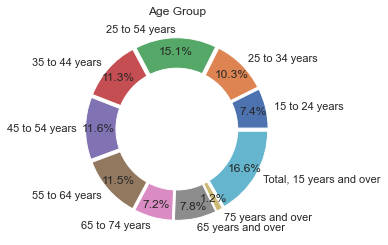

In [18]:
#calculate the percentage of  age  category
import matplotlib.pyplot as plt


# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(data, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Age Group')

# Displaying Chart
plt.show()


# ols model to analyse the relationship between independent variables that is GEO, Sex ,Employment type and dependent variable that is Response

In [19]:
import statsmodels.api as sm

In [20]:
df4=df2.copy()

In [21]:
df4.Response[(df4.Response == 'Total, satisfaction with work-home balance')]=8
df4.Response[(df4.Response == 'Very satisfied')]=7
df4.Response[(df4.Response== 'Very satisfied or satisfied')]=6
df4.Response[(df4.Response == 'Satisfied')]=5
df4.Response[(df4.Response == 'Neither satisfied nor dissatisfied')]=4
df4.Response[(df4.Response == 'Dissatisfied')]=3
df4.Response[(df4.Response== 'Very dissatisfied')]=1
df4.Response[(df4.Response == 'Dissatisfied or very dissatisfied')]=2
df4.Response[(df4.Response == 'unknown')]= 0
df4.head(9)

,GEO,Age,Sex,Employment_type,Response,Estimates,VALUE
1,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",8,Percentage of persons,100.0
5,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",6,Percentage of persons,68.1
9,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",7,Percentage of persons,18.0
13,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",5,Percentage of persons,50.1
17,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",4,Percentage of persons,20.3
21,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",2,Percentage of persons,10.7
25,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",3,Percentage of persons,9.3
29,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",1,Percentage of persons,1.3
33,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",0,Percentage of persons,0.9


In [22]:
df4['Response']=df4['Response'].astype('int')

In [23]:
ols_df=df4[['GEO','Response','Employment_type','Sex']]
ols_df

,GEO,Response,Employment_type,Sex
1,Canada,8,"Total, employment type",Both sexes
5,Canada,6,"Total, employment type",Both sexes
9,Canada,7,"Total, employment type",Both sexes
13,Canada,5,"Total, employment type",Both sexes
17,Canada,4,"Total, employment type",Both sexes
...,...,...,...,...
41803,British Columbia,6,"Total, employment type",Both sexes
41871,British Columbia,8,Self-employed,Both sexes
41875,British Columbia,6,Self-employed,Both sexes
41907,British Columbia,8,"Total, employment type",Males


In [24]:
# ols_df=ols_df

In [25]:
ols_df=pd.get_dummies(ols_df)
ols_df.head(2)

,Response,GEO_Alberta,GEO_Atlantic provinces,GEO_British Columbia,GEO_Canada,GEO_Manitoba,GEO_New Brunswick,GEO_Newfoundland and Labrador,GEO_Nova Scotia,GEO_Ontario,GEO_Prairie provinces,GEO_Prince Edward Island,GEO_Quebec,GEO_Saskatchewan,Employment_type_Paid worker,Employment_type_Self-employed,"Employment_type_Total, employment type",Sex_Both sexes,Sex_Females,Sex_Males
1,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
5,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [26]:
# ols_df.info()

In [27]:
X=ols_df[['GEO_Alberta','GEO_Atlantic provinces','GEO_Canada','GEO_Manitoba','GEO_British Columbia','GEO_Ontario','GEO_Quebec','Employment_type_Paid worker','Employment_type_Self-employed','Employment_type_Total, employment type','Sex_Both sexes','Sex_Females','Sex_Males']]
y=ols_df['Response']
est=sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     21.36
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.53e-46
Time:                        01:06:43   Log-Likelihood:                -9671.8
No. Observations:                4662   AIC:                         1.937e+04
Df Residuals:                    4649   BIC:                         1.945e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
GEO_Alberta                               -0.2371      0.118     -2.001      0.045      -0.469      -0.005
GEO_Atlantic provinces                    -0.3566      0.110     -3.248      0.001      -0.572      -0.141
GEO_Canada                                -0.9350      0.095     -9.816      0.000      -1.122      -0.748
GEO_Manitoba                               0.1482      0.131      1.134      0.257      -0.108       0.404
GEO_British Columbia                      -0.4667      0.112     -4.162      0.000      -0.687      -0.247
GEO_Ontario                               -0.5535      0.107     -5.194      0.000      -0.762      -0.345
GEO_Quebec                                -0.1354      0.115     -1.178      0.239      -0.361       0.090
Employment_type_Paid worker             7.685e+11   3.45e+12      0.222      0.824      -6e+12    7.54e+12
Employment_type_Self-employed           7.685e+11   3.45e+12      0.222      0.824      -6e+12    7.54e+12
Employment_type_Total, employment type  7.685e+11   3.45e+12      0.222      0.824      -6e+12    7.54e+12
Sex_Both sexes                         -7.685e+11   3.45e+12     -0.222      0.824   -7.54e+12       6e+12
Sex_Females                            -7.685e+11   3.45e+12     -0.222      0.824   -7.54e+12       6e+12
Sex_Males                              -7.685e+11   3.45e+12     -0.222      0.824   -7.54e+12       6e+12
==============================================================================
Omnibus:                      309.383   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.921
Skew:                          -0.344   Prob(JB):                     3.14e-40
Kurtosis:                       2.320   Cond. No.                     2.65e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.2e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# impact of employment type on job satisfaction using random forest

In [28]:
rndfr_dataframe=df2[['Response','Employment_type']]
rndfr_dataframe

,Response,Employment_type
1,"Total, satisfaction with work-home balance","Total, employment type"
5,Very satisfied or satisfied,"Total, employment type"
9,Very satisfied,"Total, employment type"
13,Satisfied,"Total, employment type"
17,Neither satisfied nor dissatisfied,"Total, employment type"
...,...,...
41803,Very satisfied or satisfied,"Total, employment type"
41871,"Total, satisfaction with work-home balance",Self-employed
41875,Very satisfied or satisfied,Self-employed
41907,"Total, satisfaction with work-home balance","Total, employment type"


In [29]:
rndfr_dataframe1=pd.get_dummies(rndfr_dataframe['Employment_type'])
rndfr_dataframe1= pd.concat([rndfr_dataframe1, rndfr_dataframe['Response']], axis=1)
rndfr_dataframe1.head(2)

,Paid worker,Self-employed,"Total, employment type",Response
1,0,0,1,"Total, satisfaction with work-home balance"
5,0,0,1,Very satisfied or satisfied


In [30]:
X=rndfr_dataframe1.drop(['Response'],axis=1)
y = rndfr_dataframe1['Response']

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn import tree

from sklearn.metrics import classification_report
"""
criterion=['gini', 'entropy', 'log_loss']

entropy a way to measure impurity
a criterion to minimize the probability of misclassification
hey take small values if most observations fall into the same class in a node. 
Contrastly, they are maximized if there’s an equal number of observations across all classes in a node. 
A node with mixed classes is called impure, and the Gini index is also known as Gini impurity."""

rndfr_clf=RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 29)

rndfr_clf.fit(X ,y )
rndfr_clf_pred=rndfr_clf.predict(X)

print(metrics.accuracy_score(y , rndfr_clf_pred))

print(confusion_matrix(y , rndfr_clf_pred))
print(classification_report(y , rndfr_clf_pred))

0.20334620334620335
[[  0   0   0   0 189   0   0 156   0]
 [  0   0   0   0 205   0   0 167   0]
 [  0   0   0   0 305   0   0 229   0]
 [  0   0   0   0 507   0   0 321   0]
 [  0   0   0   0 598   0   0 353   0]
 [  0   0   0   0  38   0   0  34   0]
 [  0   0   0   0 356   0   0 248   0]
 [  0   0   0   0 568   0   0 350   0]
 [  0   0   0   0  22   0   0  16   0]]
                                            precision    recall  f1-score   support

                              Dissatisfied       0.00      0.00      0.00       345
         Dissatisfied or very dissatisfied       0.00      0.00      0.00       372
        Neither satisfied nor dissatisfied       0.00      0.00      0.00       534
                                 Satisfied       0.00      0.00      0.00       828
Total, satisfaction with work-home balance       0.21      0.63      0.32       951
                         Very dissatisfied       0.00      0.00      0.00        72
                            Very satisf

In [32]:
importance_df = pd.DataFrame({'features':X.columns,'importance':rndfr_clf.feature_importances_})

importance_df

,features,importance
0,Paid worker,0.192664
1,Self-employed,0.569903
2,"Total, employment type",0.237433


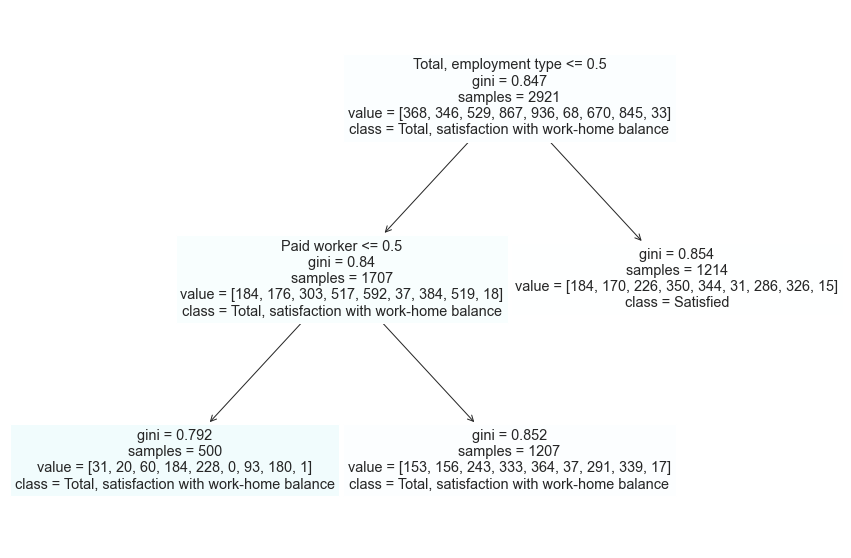

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(rndfr_clf.estimators_[5], feature_names = X.columns,class_names=['Dissatisfied','Dissatisfied or very dissatisfied ','Neither satisfied nor dissatisfied','Satisfied','Total, satisfaction with work-home balance','Very satisfied'],filled=True);

# impact of sex on job satisfaction

In [34]:
sex_df=df2[['Sex','Response']]
sex_df

,Sex,Response
1,Both sexes,"Total, satisfaction with work-home balance"
5,Both sexes,Very satisfied or satisfied
9,Both sexes,Very satisfied
13,Both sexes,Satisfied
17,Both sexes,Neither satisfied nor dissatisfied
...,...,...
41803,Both sexes,Very satisfied or satisfied
41871,Both sexes,"Total, satisfaction with work-home balance"
41875,Both sexes,Very satisfied or satisfied
41907,Males,"Total, satisfaction with work-home balance"


In [35]:
sex_df1=pd.get_dummies(sex_df['Sex'])
sex_df1= pd.concat([sex_df1, sex_df['Response']], axis=1)
sex_df1.head(2)

,Both sexes,Females,Males,Response
1,1,0,0,"Total, satisfaction with work-home balance"
5,1,0,0,Very satisfied or satisfied


In [36]:
X=sex_df1.drop(['Response'],axis=1)
y = sex_df1['Response']

In [37]:
from sklearn.metrics import classification_report

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
 
#kf = KFold(n_splits=5,random_state=42,shuffle=True)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X,y)


print(confusion_matrix(y , gradient_booster.predict(X)))


n_scores = cross_val_score(gradient_booster, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


print(classification_report(y,gradient_booster.predict(X)))

[[  0   0   0   0 345   0   0   0   0]
 [  0   0   0   0 372   0   0   0   0]
 [  0   0   0   0 534   0   0   0   0]
 [  0   0   0   0 828   0   0   0   0]
 [  0   0   0   0 951   0   0   0   0]
 [  0   0   0   0  72   0   0   0   0]
 [  0   0   0   0 604   0   0   0   0]
 [  0   0   0   0 918   0   0   0   0]
 [  0   0   0   0  38   0   0   0   0]]
Accuracy: 0.201 (0.008)
                                            precision    recall  f1-score   support

                              Dissatisfied       0.00      0.00      0.00       345
         Dissatisfied or very dissatisfied       0.00      0.00      0.00       372
        Neither satisfied nor dissatisfied       0.00      0.00      0.00       534
                                 Satisfied       0.00      0.00      0.00       828
Total, satisfaction with work-home balance       0.20      1.00      0.34       951
                         Very dissatisfied       0.00      0.00      0.00        72
                            Very sa

In [39]:
importance_df = pd.DataFrame({'features':X.columns,'importance':gradient_booster.feature_importances_})

importance_df

,features,importance
0,Both sexes,0.713357
1,Females,0.051419
2,Males,0.235224


# using Label encoding on new dataframe having GEO, Sex, ET, Age  as features to predict a person is satisfy or not using different classifier

In [58]:
df5=df2.copy()

In [59]:
df5= df5.drop(['Estimates','VALUE'],axis=1)
df5.head(2)

,GEO,Age,Sex,Employment_type,Response
1,Canada,"Total, 15 years and over",Both sexes,"Total, employment type","Total, satisfaction with work-home balance"
5,Canada,"Total, 15 years and over",Both sexes,"Total, employment type",Very satisfied or satisfied


In [57]:
df5.Response[(df5.Response == 'Very satisfied') | (df5.Response == 'Satisfied')|(df5.Response == 'Very satisfied or satisfied')|(df5.Response =='Total, satisfaction with work-home balance')] = 1
df5.Response[(df5.Response == 'Dissatisfied')|(df5.Response == 'Neither satisfied nor dissatisfied')|(df5.Response == 'Very dissatisfied')|(df5.Response == 'Dissatisfied or very dissatisfied')|(df5.Response == 'unknown')]= 0
df5.head(9)

In [61]:
inputs = df5[['GEO','Employment_type','Age','Sex']] 
inputs.head(2)

,GEO,Employment_type,Age,Sex
1,Canada,"Total, employment type","Total, 15 years and over",Both sexes
5,Canada,"Total, employment type","Total, 15 years and over",Both sexes


In [62]:
target = df5['Response']
target.head(2)

1    1
5    1
Name: Response, dtype: object

In [63]:
target=target.astype('int')
target.head(2)

1    1
5    1
Name: Response, dtype: int32

In [64]:
from sklearn.preprocessing import LabelEncoder
le_GEO = LabelEncoder()
le_Sex = LabelEncoder()
le_Employment_type = LabelEncoder()
le_Age = LabelEncoder()

In [65]:
inputs['GEO_n'] = le_GEO.fit_transform(inputs['GEO'])
inputs['Sex_n'] = le_GEO.fit_transform(inputs['Sex'])
inputs['Employment_type_n'] = le_GEO.fit_transform(inputs['Employment_type'])
inputs['Age_n'] = le_GEO.fit_transform(inputs['Age'])

In [66]:
inputs.head(2)

,GEO,Employment_type,Age,Sex,GEO_n,Sex_n,Employment_type_n,Age_n
1,Canada,"Total, employment type","Total, 15 years and over",Both sexes,3,0,2,9
5,Canada,"Total, employment type","Total, 15 years and over",Both sexes,3,0,2,9


In [67]:
inputs_n = inputs.drop(['GEO','Sex','Age','Employment_type'],axis='columns')
inputs_n.tail(3)

,GEO_n,Sex_n,Employment_type_n,Age_n
41875,2,0,1,8
41907,2,2,2,8
41911,2,2,2,8


In [68]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [69]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [70]:
model.score(inputs_n,target)

0.7140712140712141

In [71]:
model.predict([[2,0,1,8]])

array([1])

In [72]:
model.predict([[3,0,2,9]])

array([0])

In [73]:
model.predict([[1,0,2,8]])

array([1])

In [74]:
model.predict([[1,2,0,9]])

array([0])

In [75]:
model.predict([[2,1,0,5]])

array([1])

In [76]:
X = inputs_n
y = target

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [79]:
model.score(X_test,y_test)

0.5819935691318328

In [80]:
y_predicted = model.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 33, 244],
       [146, 510]], dtype=int64)

Text(66.5, 0.5, 'Truth')

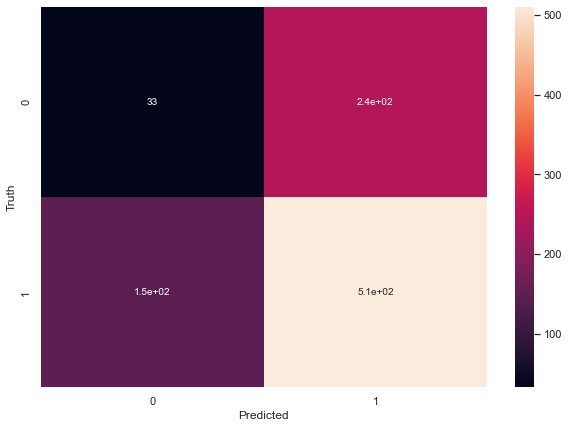

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SVM Classifier

In [83]:
from sklearn.svm import SVC
model = SVC()

In [84]:
model.fit(X_train, y_train)

SVC()

In [85]:
model.score(X_test,y_test)

0.7031082529474812

In [86]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7031082529474812

In [87]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7031082529474812

# knn classifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [89]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
knn.score(X_test, y_test)

0.6162915326902465

In [91]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 67, 210],
       [148, 508]], dtype=int64)

Text(66.5, 0.5, 'Truth')

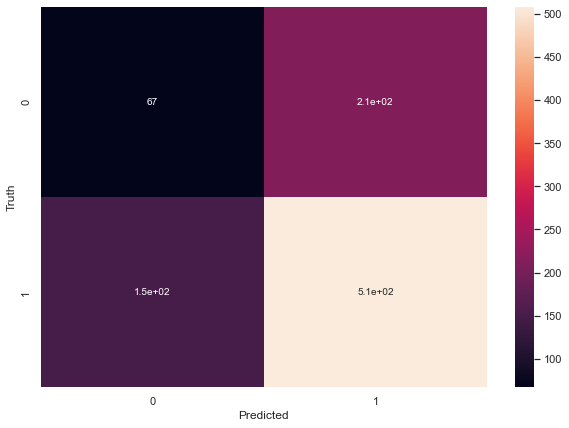

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.24      0.27       277
           1       0.71      0.77      0.74       656

    accuracy                           0.62       933
   macro avg       0.51      0.51      0.51       933
weighted avg       0.59      0.62      0.60       933



In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.3)

In [96]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7083631165117942

In [97]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7083631165117942

In [98]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5739814152966405

# NLP

In [99]:
text=rndfr_dataframe1.Response.iloc[:9]
text

1     Total, satisfaction with work-home balance
5                    Very satisfied or satisfied
9                                 Very satisfied
13                                     Satisfied
17            Neither satisfied nor dissatisfied
21             Dissatisfied or very dissatisfied
25                                  Dissatisfied
29                             Very dissatisfied
33                                       unknown
Name: Response, dtype: object

In [100]:
text=''
for Feel in rndfr_dataframe1.Response.iloc[:9]:
    for a in Feel.split():
        text = text+' '+ a

In [101]:
print(text)

 Total, satisfaction with work-home balance Very satisfied or satisfied Very satisfied Satisfied Neither satisfied nor dissatisfied Dissatisfied or very dissatisfied Dissatisfied Very dissatisfied unknown


In [102]:
# text=rndfr_dataframe1.Response
# text

In [103]:
# !pip install wordcloud


In [104]:
from wordcloud import WordCloud

In [105]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

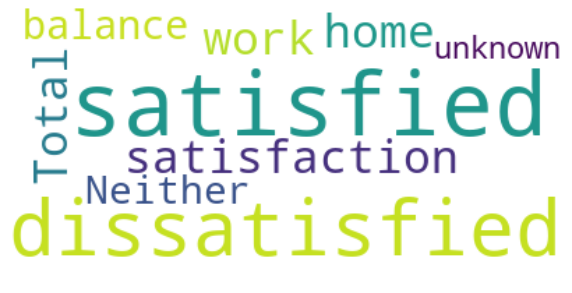

In [106]:
plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [108]:
new_df=df2[['Response']]

In [109]:
new_df['satisfaction']=df2[['Response']]

In [110]:
new_df.head(15)

,Response,satisfaction
1,"Total, satisfaction with work-home balance","Total, satisfaction with work-home balance"
5,Very satisfied or satisfied,Very satisfied or satisfied
9,Very satisfied,Very satisfied
13,Satisfied,Satisfied
17,Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied
21,Dissatisfied or very dissatisfied,Dissatisfied or very dissatisfied
25,Dissatisfied,Dissatisfied
29,Very dissatisfied,Very dissatisfied
33,unknown,unknown
37,"Total, satisfaction with work-home balance","Total, satisfaction with work-home balance"


In [111]:
new_df.satisfaction[(new_df.satisfaction == 'Total, satisfaction with work-home balance')]=8
new_df.satisfaction[(new_df.satisfaction == 'Very satisfied')]=7
new_df.satisfaction[(new_df.satisfaction== 'Very satisfied or satisfied')]=6
new_df.satisfaction[(new_df.satisfaction == 'Satisfied')]=5
new_df.satisfaction[(new_df.satisfaction == 'Neither satisfied nor dissatisfied')]=4
new_df.satisfaction[(new_df.satisfaction == 'Dissatisfied')]=3
new_df.satisfaction[(new_df.satisfaction== 'Very dissatisfied')]=1
new_df.satisfaction[(new_df.satisfaction == 'Dissatisfied or very dissatisfied')]=2
new_df.satisfaction[(new_df.satisfaction == 'unknown')]= 0
new_df.head(9)

,Response,satisfaction
1,"Total, satisfaction with work-home balance",8
5,Very satisfied or satisfied,6
9,Very satisfied,7
13,Satisfied,5
17,Neither satisfied nor dissatisfied,4
21,Dissatisfied or very dissatisfied,2
25,Dissatisfied,3
29,Very dissatisfied,1
33,unknown,0


In [112]:
new_df['satisfaction']=new_df['satisfaction'].astype('int')

In [113]:
vectorizer = CountVectorizer()
tf=TfidfTransformer()
X=new_df['Response']
y=new_df['satisfaction']

# using train test and split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

X_train = vectorizer.fit_transform(X_train)
X_train=tf.fit_transform(X_train)

X_test = vectorizer.transform(X_test)
X_test = tf.transform(X_test)

In [114]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

preds= log_model.predict(X_test)
print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        95
           5       1.00      1.00      1.00       180
           6       1.00      1.00      1.00       190
           7       1.00      1.00      1.00       127
           8       1.00      1.00      1.00       199

    accuracy                           1.00       933
   macro avg       1.00      1.00      1.00       933
weighted avg       1.00      1.00      1.00       933

1.0


In [115]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
print(classification_report(y_test,nb_preds))
print(accuracy_score(y_test, nb_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.00      0.00      0.00        13
           2       0.84      1.00      0.91        67
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        95
           5       1.00      1.00      1.00       180
           6       1.00      1.00      1.00       190
           7       1.00      1.00      1.00       127
           8       1.00      1.00      1.00       199

    accuracy                           0.99       933
   macro avg       0.87      0.89      0.88       933
weighted avg       0.97      0.99      0.98       933

0.9860664523043944


# save the model

In [116]:
import pickle

In [117]:
import numpy as np

In [118]:
file_name = 'model.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(model,file)

In [182]:
# to check the prediction with deployment:
# Results might differ 
example1 = [8,2,2,8] # -> 1
example2 = [2,1,0,9] # -> 0
example3 = [1,2,0,9] # -> 0
example4= [2,1,0,5]#->1
example5 = [4,1,0,9] # -> 1
example6 = [3,1,0,9] # -> 0
